In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('cereal.csv')

In [4]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [6]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


# Exploratory data analysis

### find missing values

In [7]:
df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [8]:
df.shape

(77, 16)

In [9]:
df1 = df.drop(['type'],axis = 1)

In [10]:
df1.head()

,name,mfr,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [11]:
df1.mfr.unique()

array(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], dtype=object)

In [12]:
df.corr()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932,0.052055
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.100438,0.450648,-0.032358,-0.759675
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.360663,0.416303,-0.495195,0.380165
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.360663,0.299262,1.000000,0.190762,-0.335269,0.025159


There is so many columns that doesnt have any correlation between another column. for example- calories, protein, fat, sodium, fiber, potass, vitamins, shelf, weight,cups. so that why we have to drop those columns. for further explore data. 

In [13]:
df2 = df1.drop([ 'calories', 'protein', 'fat', 'sodium', 'fiber', 'potass', 'vitamins', 'shelf', 'weight', 'cups'], axis=1)
df2

,name,mfr,carbo,sugars,rating
0,100% Bran,N,5.0,6,68.402973
1,100% Natural Bran,Q,8.0,8,33.983679
2,All-Bran,K,7.0,5,59.425505
3,All-Bran with Extra Fiber,K,8.0,0,93.704912
4,Almond Delight,R,14.0,8,34.384843
...,...,...,...,...,...
72,Triples,G,21.0,3,39.106174
73,Trix,G,13.0,12,27.753301
74,Wheat Chex,R,17.0,3,49.787445
75,Wheaties,G,17.0,3,51.592193


Check we have to see if any cereals have negative values for sugars or carbohydrates; if 2 or less cereals, drop those
otherwise we replace negative values with 0

In [14]:
df2[ df1.sugars <= 0 ]
df2[ df1.carbo <= 0 ]

,name,mfr,carbo,sugars,rating
57,Quaker Oatmeal,Q,-1.0,-1,50.828392


In [15]:
df2 = df2.drop ([57])
df2

,name,mfr,carbo,sugars,rating
0,100% Bran,N,5.0,6,68.402973
1,100% Natural Bran,Q,8.0,8,33.983679
2,All-Bran,K,7.0,5,59.425505
3,All-Bran with Extra Fiber,K,8.0,0,93.704912
4,Almond Delight,R,14.0,8,34.384843
...,...,...,...,...,...
72,Triples,G,21.0,3,39.106174
73,Trix,G,13.0,12,27.753301
74,Wheat Chex,R,17.0,3,49.787445
75,Wheaties,G,17.0,3,51.592193


<AxesSubplot:xlabel='rating', ylabel='sugars'>

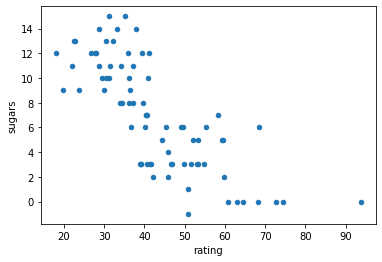

In [23]:
df1.plot(kind='scatter', x= 'rating', y= 'sugars')

as we see there is negative relation between sugars and rating. that means if sugar level low then rating is increase.

In [16]:
sns.set_style( 'whitegrid')

<AxesSubplot:xlabel='mfr', ylabel='count'>

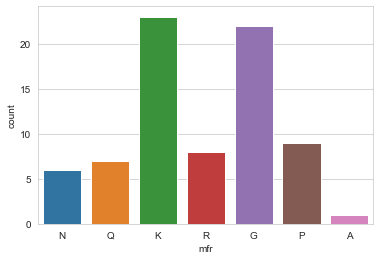

In [17]:
# Plot number of products per manufacturer 
sns.countplot (x='mfr', data=df2)

 There is only one cereal from American Home Foods Company so we drop that data sample


In [18]:
df2[df2.mfr == 'A']

,name,mfr,carbo,sugars,rating
43,Maypo,A,16.0,3,54.850917


In [22]:
df3 = df2.drop([43])
df3.head()

,name,mfr,carbo,sugars,rating
0,100% Bran,N,5.0,6,68.402973
1,100% Natural Bran,Q,8.0,8,33.983679
2,All-Bran,K,7.0,5,59.425505
3,All-Bran with Extra Fiber,K,8.0,0,93.704912
4,Almond Delight,R,14.0,8,34.384843


In [23]:
df3.shape

(75, 5)

 For plots we have to put name of manufacturer instead of N, Q etc.

In [24]:
def name (mfr) :
    if (mfr =='G'):
        return('General Mills')
    elif (mfr =='K'):
        return('Kellogs')
    elif (mfr =='N'):
        return('Nabisco')
    elif (mfr =='P'):
        return('Post')
    elif (mfr =='Q'):
        return('Quaker Oats')
    elif (mfr =='R'):
        return('Ralston Purina')

In [27]:
df3['Manufacturer']= df3['mfr'].apply (name)
df3

,name,mfr,carbo,sugars,rating,Manufacturer
0,100% Bran,N,5.0,6,68.402973,Nabisco
1,100% Natural Bran,Q,8.0,8,33.983679,Quaker Oats
2,All-Bran,K,7.0,5,59.425505,Kellogs
3,All-Bran with Extra Fiber,K,8.0,0,93.704912,Kellogs
4,Almond Delight,R,14.0,8,34.384843,Ralston Purina
...,...,...,...,...,...,...
72,Triples,G,21.0,3,39.106174,General Mills
73,Trix,G,13.0,12,27.753301,General Mills
74,Wheat Chex,R,17.0,3,49.787445,Ralston Purina
75,Wheaties,G,17.0,3,51.592193,General Mills


In [28]:
df4 = df3.drop(['mfr'],axis=1)
df4

,name,carbo,sugars,rating,Manufacturer
0,100% Bran,5.0,6,68.402973,Nabisco
1,100% Natural Bran,8.0,8,33.983679,Quaker Oats
2,All-Bran,7.0,5,59.425505,Kellogs
3,All-Bran with Extra Fiber,8.0,0,93.704912,Kellogs
4,Almond Delight,14.0,8,34.384843,Ralston Purina
...,...,...,...,...,...
72,Triples,21.0,3,39.106174,General Mills
73,Trix,13.0,12,27.753301,General Mills
74,Wheat Chex,17.0,3,49.787445,Ralston Purina
75,Wheaties,17.0,3,51.592193,General Mills


Plot to see which manufacturer  has highest rated cereals

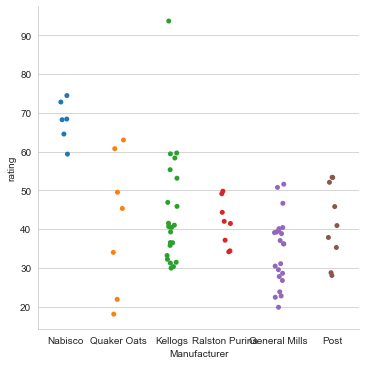

In [29]:

sns.catplot(x='Manufacturer', y='rating', data= df4)

In [32]:
df4[df4.rating == 93.704912]

,name,carbo,sugars,rating,Manufacturer
3,All-Bran with Extra Fiber,8.0,0,93.704912,Kellogs


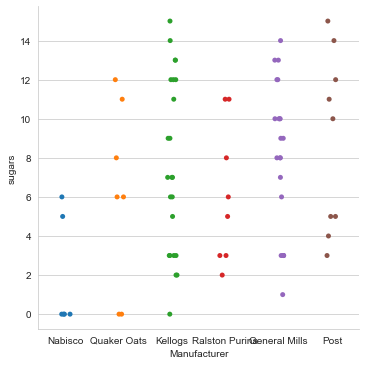

In [33]:
# Look at sugars per brand by plotting
sns.catplot(x='Manufacturer', y='sugars', data=df4)

# KNN clustring Algorithm

### Cluster used for Sugars column

Cluster by sugars into highest, middle and lowest levels; random initial guess

In [36]:
# Get data for clustering
X = df4.sugars.values
number = len(X)
X= np.reshape( X, (number,1))

In [37]:
K=3
km = KMeans( 
    n_clusters=K, init ='random' ,random_state=0  
    )
km.fit(X)
means = km.cluster_centers_
labels=km.labels_

In [38]:
df4['sugars_clusters'] = labels
df4

,name,carbo,sugars,rating,Manufacturer,sugars_clusters
0,100% Bran,5.0,6,68.402973,Nabisco,1
1,100% Natural Bran,8.0,8,33.983679,Quaker Oats,1
2,All-Bran,7.0,5,59.425505,Kellogs,1
3,All-Bran with Extra Fiber,8.0,0,93.704912,Kellogs,0
4,Almond Delight,14.0,8,34.384843,Ralston Purina,1
...,...,...,...,...,...,...
72,Triples,21.0,3,39.106174,General Mills,0
73,Trix,13.0,12,27.753301,General Mills,2
74,Wheat Chex,17.0,3,49.787445,Ralston Purina,0
75,Wheaties,17.0,3,51.592193,General Mills,0


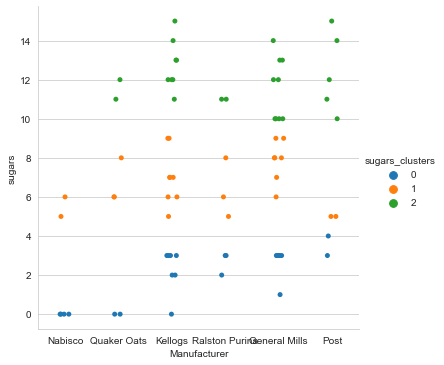

In [39]:
sns.catplot (x='Manufacturer', y='sugars', hue='sugars_clusters', data=df4)

to find which cluster number is belongs to lowest, middle and highest level and create a new
column in dataframe using .map

In [40]:
df4['sugar_levels'] = df4['sugars_clusters'].map(  \
                {0:"low",\
                1:"medium", \
                2:"high" }   )
df4

,name,carbo,sugars,rating,Manufacturer,sugars_clusters,sugar_levels
0,100% Bran,5.0,6,68.402973,Nabisco,1,medium
1,100% Natural Bran,8.0,8,33.983679,Quaker Oats,1,medium
2,All-Bran,7.0,5,59.425505,Kellogs,1,medium
3,All-Bran with Extra Fiber,8.0,0,93.704912,Kellogs,0,low
4,Almond Delight,14.0,8,34.384843,Ralston Purina,1,medium
...,...,...,...,...,...,...,...
72,Triples,21.0,3,39.106174,General Mills,0,low
73,Trix,13.0,12,27.753301,General Mills,2,high
74,Wheat Chex,17.0,3,49.787445,Ralston Purina,0,low
75,Wheaties,17.0,3,51.592193,General Mills,0,low


<AxesSubplot:xlabel='sugar_levels', ylabel='count'>

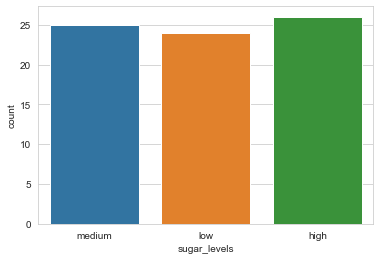

In [41]:
sns.countplot (x='sugar_levels', data=df4)

In [42]:
# Which cereals have the highest sugar levels
df4[df4.sugars_clusters == 2]

,name,carbo,sugars,rating,Manufacturer,sugars_clusters,sugar_levels
5,Apple Cinnamon Cheerios,10.5,10,29.509541,General Mills,2,high
6,Apple Jacks,11.0,14,33.174094,Kellogs,2,high
10,Cap'n'Crunch,12.0,12,18.042851,Quaker Oats,2,high
14,Cocoa Puffs,12.0,13,22.736446,General Mills,2,high
17,Corn Pops,13.0,12,35.782791,Kellogs,2,high
18,Count Chocula,12.0,13,22.396513,General Mills,2,high
22,Crispy Wheat & Raisins,11.0,10,36.176196,General Mills,2,high
24,Froot Loops,11.0,13,32.207582,Kellogs,2,high
25,Frosted Flakes,14.0,11,31.435973,Kellogs,2,high
27,Fruit & Fibre Dates; Walnuts; and Oats,12.0,10,40.917047,Post,2,high


In [45]:
df4[df4.sugars_clusters == 2].shape

(26, 7)

In [46]:
# Which cereals have the lowest sugar levels
df4[df4.sugars_clusters == 0].shape

(24, 7)

### Cluster Used for Carbohydrate column

In [47]:
#get data for clustering
Y = df4.carbo.values
number = len(Y)
Y= np.reshape( Y, (number,1))

In [61]:
K=3
km = KMeans( 
    n_clusters=K, init ='random' ,random_state=0  
    )
km.fit(Y)
means = km.cluster_centers_
labels_c=km.labels_
 

In [62]:
df4['carbo_clusters'] = labels_c
df4

,name,carbo,sugars,rating,Manufacturer,sugars_clusters,sugar_levels,carbo_clusters,carbo_levels
0,100% Bran,5.0,6,68.402973,Nabisco,1,medium,1,medium
1,100% Natural Bran,8.0,8,33.983679,Quaker Oats,1,medium,1,medium
2,All-Bran,7.0,5,59.425505,Kellogs,1,medium,1,medium
3,All-Bran with Extra Fiber,8.0,0,93.704912,Kellogs,0,low,1,medium
4,Almond Delight,14.0,8,34.384843,Ralston Purina,1,medium,0,low
...,...,...,...,...,...,...,...,...,...
72,Triples,21.0,3,39.106174,General Mills,0,low,2,high
73,Trix,13.0,12,27.753301,General Mills,2,high,1,medium
74,Wheat Chex,17.0,3,49.787445,Ralston Purina,0,low,0,low
75,Wheaties,17.0,3,51.592193,General Mills,0,low,0,low


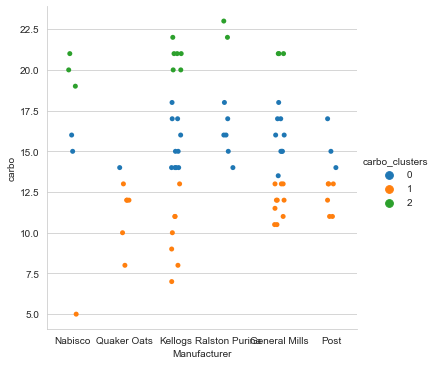

In [63]:
sns.catplot (x='Manufacturer', y='carbo', hue='carbo_clusters', data=df4)

In [57]:
df4['carbo_levels'] = df4['carbo_clusters'].map(  \
                {0:"low",\
                1:"medium", \
                2:"high" }   )
df4

,name,carbo,sugars,rating,Manufacturer,sugars_clusters,sugar_levels,carbo_clusters,carbo_levels
0,100% Bran,5.0,6,68.402973,Nabisco,1,medium,1,medium
1,100% Natural Bran,8.0,8,33.983679,Quaker Oats,1,medium,1,medium
2,All-Bran,7.0,5,59.425505,Kellogs,1,medium,1,medium
3,All-Bran with Extra Fiber,8.0,0,93.704912,Kellogs,0,low,1,medium
4,Almond Delight,14.0,8,34.384843,Ralston Purina,1,medium,0,low
...,...,...,...,...,...,...,...,...,...
72,Triples,21.0,3,39.106174,General Mills,0,low,2,high
73,Trix,13.0,12,27.753301,General Mills,2,high,1,medium
74,Wheat Chex,17.0,3,49.787445,Ralston Purina,0,low,0,low
75,Wheaties,17.0,3,51.592193,General Mills,0,low,0,low


<AxesSubplot:xlabel='carbo_levels', ylabel='count'>

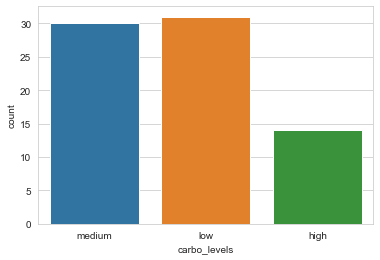

In [58]:
sns.countplot (x='carbo_levels', data=df4)

In [59]:
df4[df4.carbo_clusters == 2].shape

(14, 9)

after this clustring we can findout howmany cereal with low carbohydrates and low sugars

In [60]:
df4[df4.carbo_clusters == 0][df4.sugars_clusters == 0]

<ipython-input-60-82e3dfb1a65f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4[df4.carbo_clusters == 0][df4.sugars_clusters == 0]


,name,carbo,sugars,rating,Manufacturer,sugars_clusters,sugar_levels,carbo_clusters,carbo_levels
11,Cheerios,17.0,1,50.764999,General Mills,0,low,0,low
33,Grape-Nuts,17.0,3,53.371007,Post,0,low,0,low
50,Nutri-grain Wheat,18.0,2,59.642837,Kellogs,0,low,0,low
63,Shredded Wheat,16.0,0,68.235885,Nabisco,0,low,0,low
67,Special K,16.0,3,53.131324,Kellogs,0,low,0,low
71,Total Whole Grain,16.0,3,46.658844,General Mills,0,low,0,low
74,Wheat Chex,17.0,3,49.787445,Ralston Purina,0,low,0,low
75,Wheaties,17.0,3,51.592193,General Mills,0,low,0,low


after this clustring we can findout howmany cereal with high carbohydrates and low sugars

In [65]:
df4[df4.carbo_clusters == 2][df4.sugars_clusters == 0]

<ipython-input-65-89d5696030a9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4[df4.carbo_clusters == 2][df4.sugars_clusters == 0]


,name,carbo,sugars,rating,Manufacturer,sugars_clusters,sugar_levels,carbo_clusters,carbo_levels
15,Corn Chex,22.0,3,41.445019,Ralston Purina,0,low,2,high
16,Corn Flakes,21.0,2,45.863324,Kellogs,0,low,2,high
20,Cream of Wheat (Quick),21.0,0,64.533816,Nabisco,0,low,2,high
21,Crispix,21.0,3,46.895644,Kellogs,0,low,2,high
40,Kix,21.0,3,39.241114,General Mills,0,low,2,high
53,Product 19,20.0,3,41.503540,Kellogs,0,low,2,high
61,Rice Chex,23.0,2,41.998933,Ralston Purina,0,low,2,high
62,Rice Krispies,22.0,3,40.560159,Kellogs,0,low,2,high
64,Shredded Wheat 'n'Bran,19.0,0,74.472949,Nabisco,0,low,2,high
65,Shredded Wheat spoon size,20.0,0,72.801787,Nabisco,0,low,2,high
